# View Node
1 -> 0

Gebruik voor deze node de (blauwe) Python View node. Na *Execution*, klik met de rechtermuisknop op de node en selecteer *View: Image output*.

In [1]:
###
### HEADER
###
import geopandas as gpd
import pandas as pd
from shapely import wkt as WKT

# pandas (wkt) to geopandas (geometry)
def dfToGdf(df):
    gdf = gpd.GeoDataFrame(df, copy=True)
    gdf['geometry'] = df.wkt.apply(WKT.loads)
    gdf.drop(columns='wkt', inplace=True)
    return gdf

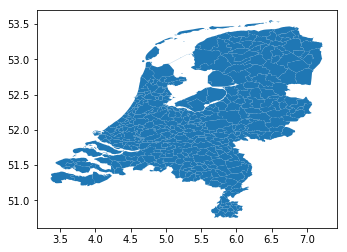

In [6]:
###
### VIEW
###
from io import BytesIO

# convert input_table to geodataframe
gdf = dfToGdf(input_table)

# create buffer to write into
buffer = BytesIO()

# create plot and write into the buffer
gdf.plot().get_figure().savefig(buffer, format='png')

# the output is the content of the buffer
output_image = buffer.getvalue()

## Load some input data to test the cells above
Run `Header` node first!

In [5]:
###
### SOURCE - ONLY FOR PREPARATION
###
from os.path import join
folder = '/home/ab/i/Open-data/shapefiles/shp-gemeente'
filename = 'gemeente-grenzen.shp'

# read the file
gdf = gpd.read_file( join(folder, filename) )
gdf = gdf.to_crs(epsg=4326)    # WGS84

# geopandas (geometry) to pandas (wkt)
def gdfToDf(gdf):
    df = pd.DataFrame(gdf, copy=True)
    df['wkt'] = gdf.geometry.apply(lambda wkt: WKT.dumps(wkt, trim=True))
    df.drop(columns='geometry', inplace=True)
    return df

# output
output_table = gdfToDf(gdf)

# copy output to input
input_table = output_table.copy()

# laat het plaatje hier ook zien
%matplotlib inline